In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import power_transform, MinMaxScaler, StandardScaler
from sklearn.metrics import f1_score, roc_auc_score, recall_score, accuracy_score, precision_score
import os

In [2]:
os.getcwd()

'/Users/antares/PycharmProjects/eth_fraud_ml/ETH-scam-ml/modded'

In [3]:
df = pd.read_csv('data/eth_fraud_txn_kaggle_full.csv')
f_txn = len(df[df['flag'] == 1])
print('The amount of fraud txns is', f_txn, '\n This is {:.2f}%'.format(f_txn/len(df)*100), 'of the original dataset')

The amount of fraud txns is 2179 
 This is 22.14% of the original dataset


In [4]:
df= df.dropna()
print(df.shape)

(8981, 43)


In [5]:
df.nunique()

address                                  8956
flag                                        2
avg_min_between_sent_txn                 4809
avg_min_between_received_txn             5796
time_diff_between_first_and_last_mins    7256
sent_txn                                  634
received_txn                              720
number_of_created_contracts                20
unique_received_from_addresses            248
unique_sent_to_addresses                  253
min_val_received                         4422
max_val_received                         6092
avg_val_received                         6383
min_val_sent                             4418
max_val_sent                             6304
avg_val_sent                             5465
min_value_sent_to_contract                  3
max_val_sent_to_contract                    4
avg_value_sent_to_contract                  4
total_transactions_inc_cnts               892
total_ether_sent                         5481
total_ether_received              

In [6]:
df.columns

Index(['address', 'flag', 'avg_min_between_sent_txn',
       'avg_min_between_received_txn', 'time_diff_between_first_and_last_mins',
       'sent_txn', 'received_txn', 'number_of_created_contracts',
       'unique_received_from_addresses', 'unique_sent_to_addresses',
       'min_val_received', 'max_val_received', 'avg_val_received',
       'min_val_sent', 'max_val_sent', 'avg_val_sent',
       'min_value_sent_to_contract', 'max_val_sent_to_contract',
       'avg_value_sent_to_contract', 'total_transactions_inc_cnts',
       'total_ether_sent', 'total_ether_received',
       'total_ether_sent_contracts', 'total_ether_balance', 'total_erc20_txns',
       'erc20_total_ether_received', 'erc20_total_ether_sent',
       'erc20_total_ether_sent_contract', 'erc20_uniq_sent_addr',
       'erc20_uniq_rec_addr', 'erc20_uniq_sent_addr1',
       'erc20_uniq_rec_contract_addr', 'erc20_avg_time_between_contract_txn',
       'erc20_min_val_rec', 'erc20_max_val_rec', 'erc20_avg_val_rec',
       'erc20

In [7]:
dfunique = df.nunique() # number of unique values in each column
boring = dfunique[dfunique < 5 ]
boring # only columns with more than 1 unique value

flag                                   2
min_value_sent_to_contract             3
max_val_sent_to_contract               4
avg_value_sent_to_contract             4
total_ether_sent_contracts             4
erc20_uniq_sent_addr1                  4
erc20_avg_time_between_contract_txn    1
dtype: int64

In [8]:
boring.drop(['flag'],inplace=True)
df.drop(boring.index,axis=1,inplace=True)

In [9]:
# double check
df.nunique()
# Interesting note : there are some addresses with more than 1 row

address                                  8956
flag                                        2
avg_min_between_sent_txn                 4809
avg_min_between_received_txn             5796
time_diff_between_first_and_last_mins    7256
sent_txn                                  634
received_txn                              720
number_of_created_contracts                20
unique_received_from_addresses            248
unique_sent_to_addresses                  253
min_val_received                         4422
max_val_received                         6092
avg_val_received                         6383
min_val_sent                             4418
max_val_sent                             6304
avg_val_sent                             5465
total_transactions_inc_cnts               892
total_ether_sent                         5481
total_ether_received                     6351
total_ether_balance                      5502
total_erc20_txns                          300
erc20_total_ether_received        

In [10]:
df.columns

Index(['address', 'flag', 'avg_min_between_sent_txn',
       'avg_min_between_received_txn', 'time_diff_between_first_and_last_mins',
       'sent_txn', 'received_txn', 'number_of_created_contracts',
       'unique_received_from_addresses', 'unique_sent_to_addresses',
       'min_val_received', 'max_val_received', 'avg_val_received',
       'min_val_sent', 'max_val_sent', 'avg_val_sent',
       'total_transactions_inc_cnts', 'total_ether_sent',
       'total_ether_received', 'total_ether_balance', 'total_erc20_txns',
       'erc20_total_ether_received', 'erc20_total_ether_sent',
       'erc20_total_ether_sent_contract', 'erc20_uniq_sent_addr',
       'erc20_uniq_rec_addr', 'erc20_uniq_rec_contract_addr',
       'erc20_min_val_rec', 'erc20_max_val_rec', 'erc20_avg_val_rec',
       'erc20_min_val_sent', 'erc20_max_val_sent', 'erc20_avg_val_sent',
       'erc20_uniq_sent_token_name', 'erc20_uniq_rec_token_name',
       'erc20_most_sent_token_type', 'erc20_most_rec_token_type'],
      dtyp

In [11]:
erc20cols = [s for s in df.columns if s.startswith('erc20')]

In [12]:
df[erc20cols].describe()

,erc20_total_ether_received,erc20_total_ether_sent,erc20_total_ether_sent_contract,erc20_uniq_sent_addr,erc20_uniq_rec_addr,erc20_uniq_rec_contract_addr,erc20_min_val_rec,erc20_max_val_rec,erc20_avg_val_rec,erc20_min_val_sent,erc20_max_val_sent,erc20_avg_val_sent,erc20_uniq_sent_token_name,erc20_uniq_rec_token_name
count,8.981000e+03,8.981000e+03,8981.000000,8981.000000,8981.000000,8981.000000,8981.000000,8.981000e+03,8.981000e+03,8.981000e+03,8.981000e+03,8.981000e+03,8981.000000,8981.000000
mean,1.298948e+08,1.391636e+07,111.322139,5.652823,7.603496,4.893330,487.290899,1.255114e+08,4.336482e+06,1.178169e+04,1.308093e+07,6.340198e+06,1.386260,4.818283
std,1.055675e+10,1.182425e+09,6139.200746,105.433660,81.958171,17.264946,16912.370971,1.055557e+10,2.144761e+08,1.055384e+06,1.181940e+09,5.924963e+08,6.746451,16.696803
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,1.000000e-12,0.000000e+00,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000
75%,1.000000e+02,0.000000e+00,0.000000,0.000000,2.000000,2.000000,0.009576,9.900000e+01,2.809250e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.000000
max,1.000020e+12,1.120000e+11,416000.000000,6582.000000,4293.000000,782.000000,990000.000000,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,213.000000,737.000000


In [13]:
cols_to_remove = ['erc20_total_ether_sent',
                  'erc20_total_eth_sent_contract',
                  'erc20_min_val_sent',
                  'erc20_max_val_sent',
                  ]

In [14]:
from scipy.stats import yeojohnson
import seaborn as sns

<AxesSubplot:xlabel='total_ether_received', ylabel='Density'>

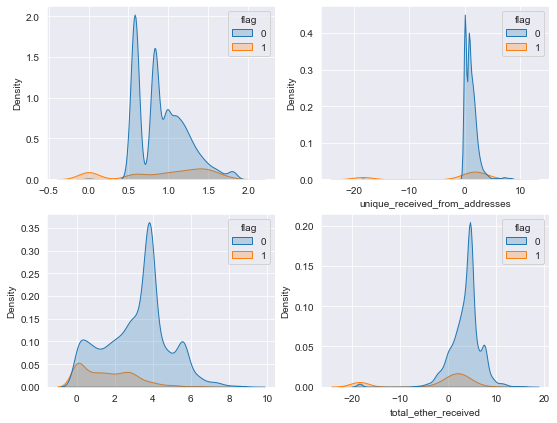

In [15]:
f, axes = plt.subplots( 2, 2, figsize=(9, 7))
sns.kdeplot(data = df, x = yeojohnson(df['unique_received_from_addresses'])[0], hue='flag', fill=True, ax = axes[0,0])
sns.kdeplot(data = df, x = yeojohnson(df['total_ether_received'])[0], hue='flag', fill=True, ax = axes[1,0])
sns.kdeplot(data = df, x = np.log(df['unique_received_from_addresses']+1e-8), hue='flag', fill=True, ax = axes[0,1])
sns.kdeplot(data = df, x = np.log(df['total_ether_received']+1e-8), hue='flag', fill=True, ax = axes[1,1])

<AxesSubplot:xlabel='time_diff_between_first_and_last_mins', ylabel='Density'>

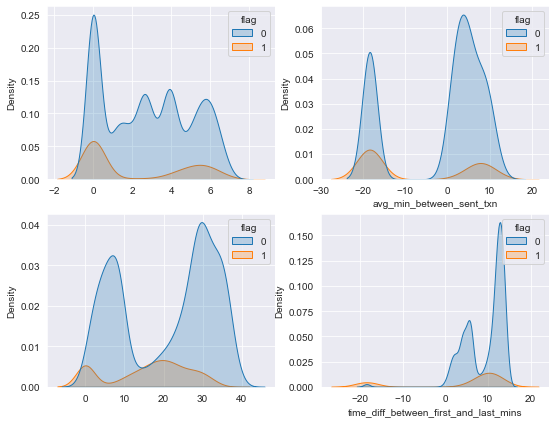

In [16]:
f, axes = plt.subplots( 2, 2, figsize=(9, 7))
sns.kdeplot(data = df, x = yeojohnson(df['avg_min_between_sent_txn'])[0], hue='flag', fill=True, ax = axes[0,0])
sns.kdeplot(data = df, x = yeojohnson(df['time_diff_between_first_and_last_mins'])[0], hue='flag', fill=True, ax = axes[1,0])
sns.kdeplot(data = df, x = np.log(df['avg_min_between_sent_txn']+1e-8), hue='flag', fill=True, ax = axes[0,1])
sns.kdeplot(data = df, x = np.log(df['time_diff_between_first_and_last_mins']+1e-8), hue='flag', fill=True, ax = axes[1,1])

In [17]:
df.nunique()

address                                  8956
flag                                        2
avg_min_between_sent_txn                 4809
avg_min_between_received_txn             5796
time_diff_between_first_and_last_mins    7256
sent_txn                                  634
received_txn                              720
number_of_created_contracts                20
unique_received_from_addresses            248
unique_sent_to_addresses                  253
min_val_received                         4422
max_val_received                         6092
avg_val_received                         6383
min_val_sent                             4418
max_val_sent                             6304
avg_val_sent                             5465
total_transactions_inc_cnts               892
total_ether_sent                         5481
total_ether_received                     6351
total_ether_balance                      5502
total_erc20_txns                          300
erc20_total_ether_received        

In [18]:
df.dtypes

address                                   object
flag                                       int64
avg_min_between_sent_txn                 float64
avg_min_between_received_txn             float64
time_diff_between_first_and_last_mins    float64
sent_txn                                   int64
received_txn                               int64
number_of_created_contracts                int64
unique_received_from_addresses             int64
unique_sent_to_addresses                   int64
min_val_received                         float64
max_val_received                         float64
avg_val_received                         float64
min_val_sent                             float64
max_val_sent                             float64
avg_val_sent                             float64
total_transactions_inc_cnts                int64
total_ether_sent                         float64
total_ether_received                     float64
total_ether_balance                      float64
total_erc20_txns    

In [19]:
# drop the columns that are not numerical
df.drop(['erc20_most_rec_token_type','erc20_most_sent_token_type'],axis=1,inplace=True)
print(df.shape)

(8981, 35)


In [20]:
def test_train_split(df: pd.DataFrame) :
    # First performing random forest
    print('Random forest can only classify numerical columns\n '
          'Dropping object type columns: {0}'.format(list(df.select_dtypes(include='object').columns)))
    df_fst = df.select_dtypes(include='number')
    x = df_fst.drop('flag',axis=1)
    y = df_fst['flag'] # y_column needs to be 1d

    return train_test_split(
        x, y,
        test_size=0.3, random_state=42
    )

In [21]:
X_train, X_test, y_train, y_test = test_train_split(df)

Random forest can only classify numerical columns
 Dropping object type columns: ['address']


In [22]:
# Hyperparameter tuning for random forest using gridsearchcv to fit the data
def random_forest_optimize(X_train, y_train):
    rf = RandomForestClassifier(random_state=42,n_jobs=-1)

    params = {
        'max_depth': [2,3,5,10,20],
        'min_samples_leaf': [5,10,20,50,100,200],
        'n_estimators': [10,25,30,50,100,200]
    }

    # fit across the entire grid and get optimal parameters
    grid_search = GridSearchCV(estimator=rf,
                               param_grid=params,
                               cv=4,
                               n_jobs=-1,
                               verbose=1,
                               scoring="f1").fit(X_train, y_train)

    print('The best parameters are {}'.format(grid_search.best_params_))
    print('Modeling with the optimal parameters')
    rf = RandomForestClassifier(**grid_search.best_params_,random_state=42,n_jobs=-1)
    return rf


In [23]:
rf_opt = random_forest_optimize(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
The best parameters are {'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 100}
Modeling with the optimal parameters


In [24]:
def opt_pred(X_train, y_train, X_test, y_test):

    # refit with best parameters
    rf_opt.fit(X_train,y_train)
    y_pred_ = rf_opt.predict(X_test)
    print('F1 = {:.4f}'.format(f1_score(y_test, y_pred_)))
    print('ROC = {:.4f}'.format(roc_auc_score(y_test,y_pred_)))
    print('recall = {:.4f}'.format(recall_score(y_test,y_pred_)))
    print('acc = {:.4f}'.format(accuracy_score(y_test,y_pred_)))
    print('precision = {:.4f}'.format(precision_score(y_test,y_pred_)))
    return y_pred_

In [25]:
y_pred = opt_pred(X_train, y_train, X_test, y_test)

F1 = 0.9263
ROC = 0.9398
recall = 0.8840
acc = 0.9788
precision = 0.9728


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2280,   10],
       [  47,  358]])

In [27]:
def get_features_importances(X_train, rf):
    feature_imp_df = pd.DataFrame({"Features" : X_train.columns,
                                   "Importance" : rf.feature_importances_})
    return feature_imp_df.sort_values(by="Importance",ascending=False)

In [28]:
def plot_feature_importances(X_train, rf):
    from matplotlib import pyplot as plt
    feat_importances = rf.feature_importances_
    indices = np.argsort(feat_importances)
    # plot
    columns = np.array(X_train.columns)
    fig, ax = plt.subplots(figsize=(14, 10))
    plt.title("Ranked feature importances")
    plt.barh(range(len(feat_importances)), feat_importances[indices], align="center")
    features = ['feature_{}'.format(columns[i]) for i in range(len(columns))]
    plt.yticks(range(len(feat_importances)), [features[idx] for idx in indices])
    plt.ylim([-1, len(feat_importances)])
    plt.show()

In [29]:
get_features_importances(X_train, rf_opt)


,Features,Importance
2,time_diff_between_first_and_last_mins,0.134607
25,erc20_min_val_rec,0.109945
26,erc20_max_val_rec,0.075763
18,total_erc20_txns,0.068791
14,total_transactions_inc_cnts,0.058619
19,erc20_total_ether_received,0.057517
1,avg_min_between_received_txn,0.052522
32,erc20_uniq_rec_token_name,0.052072
6,unique_received_from_addresses,0.046438
27,erc20_avg_val_rec,0.038881


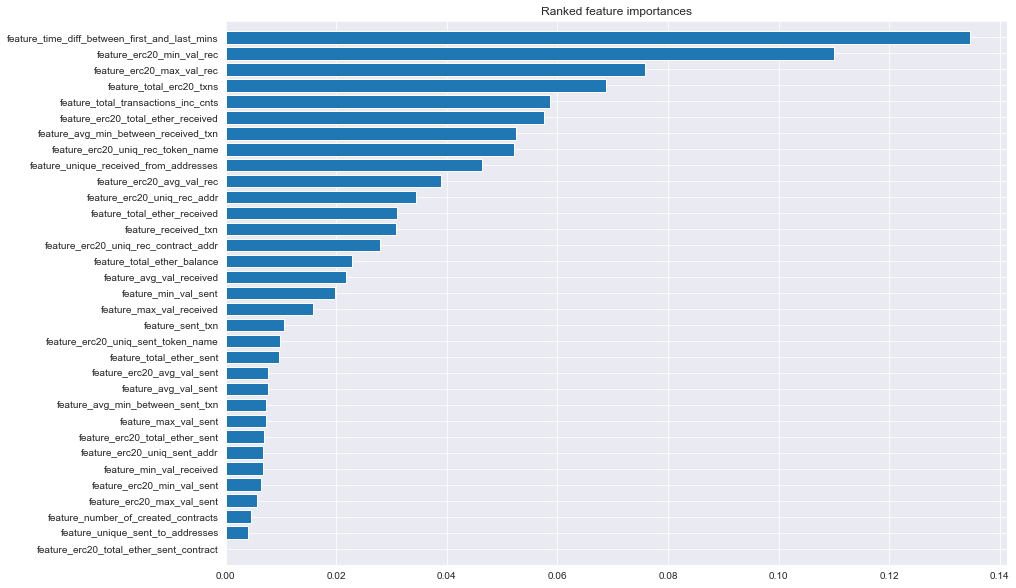

In [30]:
plot_feature_importances(X_train, rf_opt)

In [31]:
df.drop(['erc20_total_ether_sent_contract',
         'unique_sent_to_addresses',
         'number_of_created_contracts'],
        axis=1,
        inplace=True)

In [32]:
X_train, X_test, y_train, y_test = test_train_split(df)

Random forest can only classify numerical columns
 Dropping object type columns: ['address']


In [33]:
rf_opt = random_forest_optimize(X_train, y_train)
rf_opt.fit(X_train, y_train)


Fitting 4 folds for each of 180 candidates, totalling 720 fits
The best parameters are {'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 200}
Modeling with the optimal parameters


RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [34]:
y_pred = opt_pred(X_train, y_train, X_test, y_test)

F1 = 0.9209
ROC = 0.9359
recall = 0.8765
acc = 0.9774
precision = 0.9699


In [35]:
get_features_importances(X_train, rf_opt)

,Features,Importance
2,time_diff_between_first_and_last_mins,0.145210
22,erc20_min_val_rec,0.124341
16,total_erc20_txns,0.077488
23,erc20_max_val_rec,0.069438
17,erc20_total_ether_received,0.057152
1,avg_min_between_received_txn,0.053838
12,total_transactions_inc_cnts,0.047528
5,unique_received_from_addresses,0.043872
29,erc20_uniq_rec_token_name,0.040277
20,erc20_uniq_rec_addr,0.035813


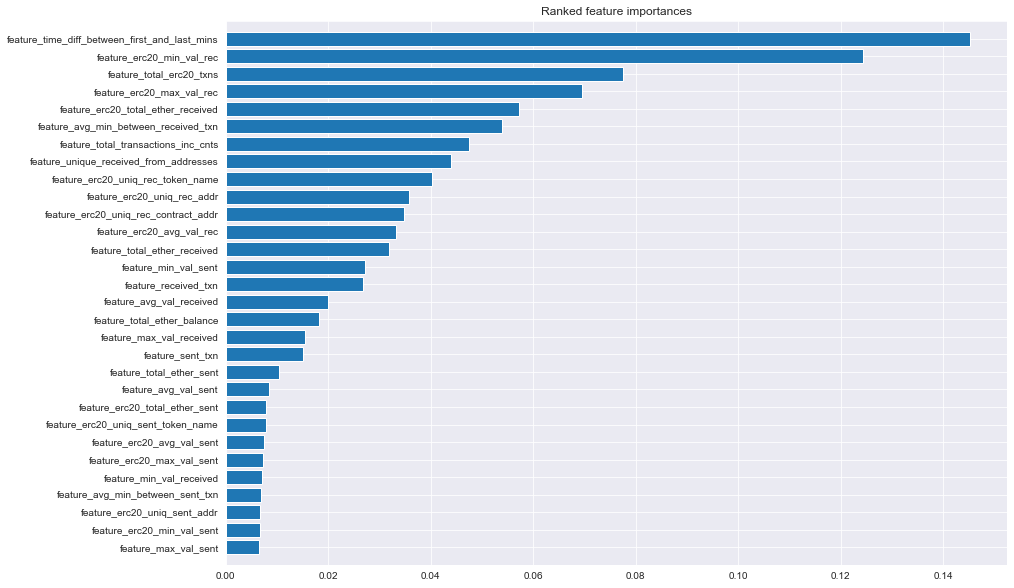

In [36]:
plot_feature_importances(X_train, rf_opt)